# Generation of binary images containing different type and size of shapes

This notebook generates binary images for the Counting simple shapes (circles, squares or diamonds) experiment. (Code from https://github.com/rpmcruz/cnn-count has been used as a starting point and modified accordingly).

There are 4 different datasets of binary images for the purposes of this experiment:

<b>
Dataset1 containing images with circular shapes with the same radius.
    
Dataset2 containing images with diamond shapes with different radii.

Dataset3 containing images with circular, diamond and square shapes with the same size/radius.

Dataset4 containing images with circular, diamond and square shapes with different sizes/radii.
</b>

Please, note that if the generated files are deleted and the notebook ran again, the new dataset will be different that the original as many generation parameters are random (the location of the shapes is always random).

The number of shapes per image for all datasets is a random number between 1 and 3. Therefore the classification result is one of the classes '1', '2' or '3, where the class corresponds to the shapes count in the image. Each shape is at a random location and occlusion is not allowed. For the images with different shapes, the type is chosen randomly from circle, diamond and sqaure.

The images dimensions are 64x64 and the datasets contain 60k images (lates split in 42k for training, 12k for validaiton and 6k for testing in the other notebooks). Te shape size (or 'radius') is an integer between 2 and 6 pixels. For the shapes with the same size (radius), the average of 4 pixels is used.

### Settings

In [1]:
# Imports
from CNNcount import shape_images as si
import numpy as np
import matplotlib.pyplot as plt
from numpy import savez, load
import os.path

In [2]:
# define constants
NIM = 60000
NMIN, NMAX = 1, 3  # nbr of shapes
RMIN, RMAX = 2, 6  # shape radius
IMGSIZE = 64
OCCL = 0

In [3]:
# filenames for saving the data as NPZ files (NumPy compressed)
same_shape_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/circles_same_radius_60k.npz"
same_shape_diff_radii_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diamonds_diff_radii_60k.npz"
diff_shapes_same_radius_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_same_radius_60k.npz"
diff_shapes_diff_radii_fname = "/home/elena/eStep/XAI/Data/CountingShapes/diff_shapes_diff_radii_60k.npz"

## Generation of binary images with up to 3 of the same shape (circle) and same radius

In [4]:
# generate large training set of NIM images with the same type and same radius
if os.path.isfile(same_shape_same_radius_fname): # already generated- just load
    print ("The file containing images of the same shape (circle) with same radius already exist!")
    # load from NPZ file for display
    data = load(same_shape_same_radius_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    shape_type_ind = 0 # circles
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))
        shapes = [(shape_type_ind, shape_radius) for _ in range(n)]
        img = si.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of the same shape (circle) with same radius have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(same_shape_same_radius_fname,images=X,labels=Y)
    images = X
    labels = Y

Generating data...
The images of the same shape (circle) with same radius have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


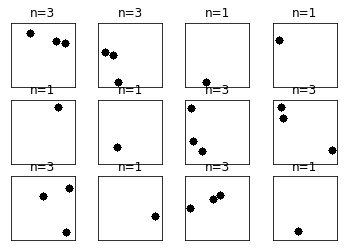

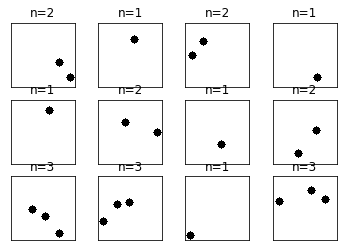

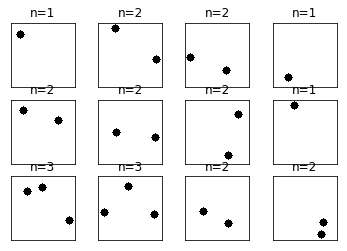

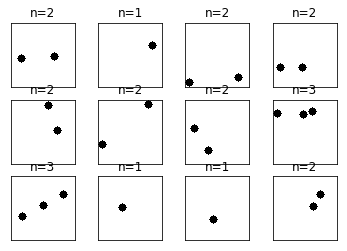

In [5]:
# plot random 4x12 of the generated NIM images
si.plot_12images(images, labels)
si.plot_12images(images, labels)
si.plot_12images(images, labels)
si.plot_12images(images, labels)

## Generation of binary images with up to 3 of the same shape (diamond) with different radii

In [6]:
# generate NIMD test images with the same shape and different radii
if os.path.isfile(same_shape_diff_radii_fname): # already generated- just load
    print ("The file containing images of the same shape (diamonds) with different radii already exist!")
    # load from NPZ file for display
    data = load(same_shape_diff_radii_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    shape_type_ind = 1 # diamonds    
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))
        shapes = [(shape_type_ind, np.random.randint(RMIN, RMAX)) for _ in range(n)]
        img = si.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of the same shape (diamonds) with different radii have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(same_shape_diff_radii_fname,images=X,labels=Y)
    images = X
    labels = Y


Generating data...
The images of the same shape (diamonds) with different radii have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


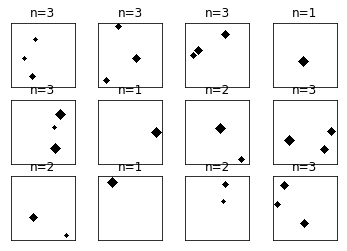

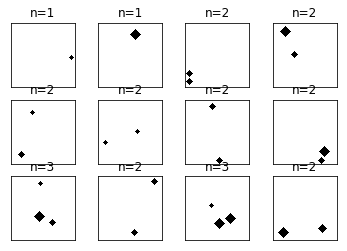

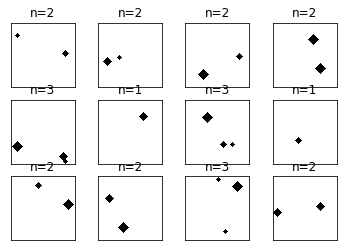

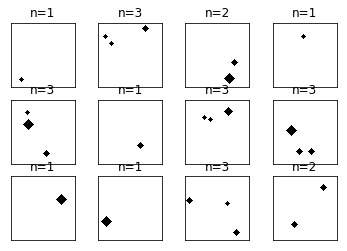

In [7]:
# plot random 4x12 of the generated NIM images
si.plot_12images(images, labels)
si.plot_12images(images, labels)
si.plot_12images(images, labels)
si.plot_12images(images, labels)

## Generation of binary images with up to 3 different shapes (circle, diamond, square) with the same radius

In [8]:
# generate NIM test images with random type shapes and same radius
num_shapes = len(si.SHAPES)
if os.path.isfile(diff_shapes_same_radius_fname): # already generated- just load
    print ("The file containing images of the different shapes (circle, diamond, square) with same radius already exist!")
    # load from NPZ file for display
    data = load(diff_shapes_same_radius_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))        
        shapes = [(np.random.randint(num_shapes), shape_radius) for _ in range(n)]
        img = si.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of different shapes with same radius have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(diff_shapes_same_radius_fname,images=X,labels=Y)
    images = X
    labels = Y

Generating data...
The images of different shapes with same radius have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


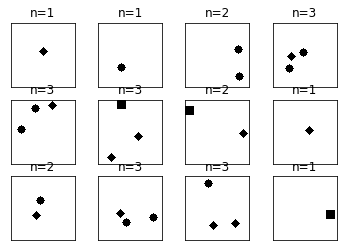

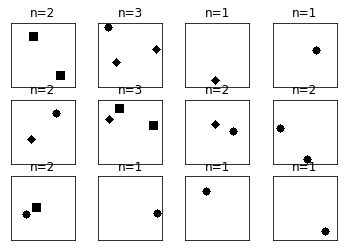

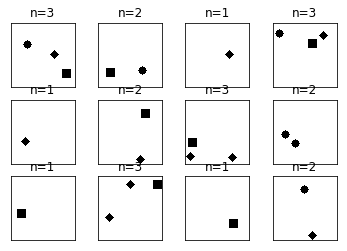

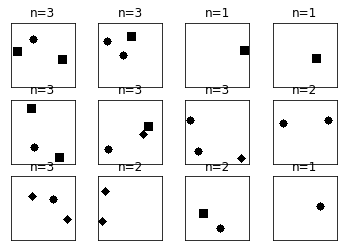

In [9]:
# plot random 4x12 of the generated NIM images
si.plot_12images(images, labels)
si.plot_12images(images, labels)
si.plot_12images(images, labels)
si.plot_12images(images, labels)

## Generation of binary images with up to 3 different shapes (circle, diamond, square) with different radii

In [10]:
# generate NIMD test images with random type shapes and random radius
num_shapes = len(si.SHAPES)
if os.path.isfile(diff_shapes_diff_radii_fname): # already generated- just load
    print ("The file containing images of the different shapes (circle, diamond, square) with different radii already exist!")
    # load from NPZ file for display
    data = load(diff_shapes_diff_radii_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data    
    
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1)) 
        shapes = [(np.random.randint(num_shapes), np.random.randint(RMIN, RMAX)) for _ in range(n)]
        img = si.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of different shapes with different radii have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(diff_shapes_diff_radii_fname,images=X,labels=Y)
    images = X
    labels = Y        


Generating data...
The images of different shapes with different radii have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


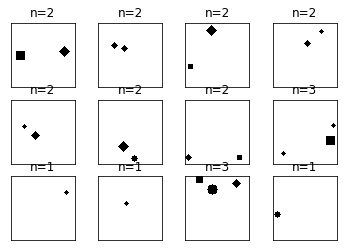

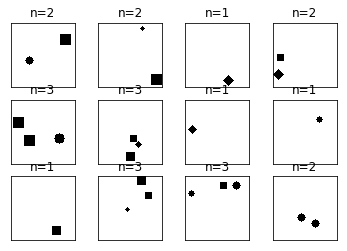

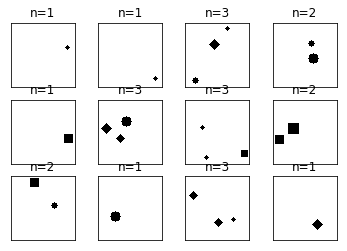

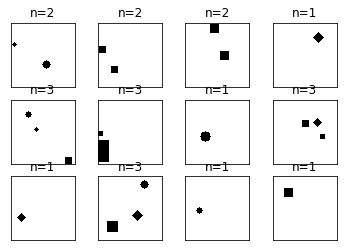

In [11]:
# plot random 4x12 of the generated NIM images
si.plot_12images(images, labels)
si.plot_12images(images, labels)
si.plot_12images(images, labels)
si.plot_12images(images, labels)